# Problem 3

In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<a href="javascript:code_toggle()">
<button>Toggle Code</button></a>''')

In [2]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

# set random seed
np.random.seed(1000)

In [3]:
"""
    Create 100 random points from different distributions
"""
# uniform
uniform = np.random.rand(100,2)

# gaussian
gaussian = np.random.randn(100,2)

# poisson
poisson = np.random.poisson(3,(100,2))

In [4]:
"""
    Create SOM
"""
class SOM:
    """
        A self organizing map
    """
    def __init__(self,data_input,lr=400,lt=1,nr=400,nt=3,iterations=1000):
        """
            Initialization
        """
        # store the input
        self.data = data_input
        
        # store learning rates
        self.lr = lambda t: lt*np.exp(-t/lr)
        self.nr = lambda t: nt*np.exp(-t/nr)
        
        # store iterations
        self.iterations = iterations
        
        # create the weights
        self.w = np.random.rand(10,10,2)
        
        # set neighborhood (I use a 2D gaussian)
        self.neighborhood = lambda sigma: self.gkern(sig=sigma)
        
    def train(self):
        """
            Train the SOM
        """ 
        for i in range(self.iterations):
            # choose a random input
            idx = int(np.round(np.random.rand()*99))
            selected_input = self.data[idx,:]

            # Initialize small distance value
            smallest_distance = 999999

            # set initial BMU (best matching unit)
            BMU = (100,100)

            # loop over every node in map
            for i,w_x1 in enumerate(self.w):
                for j,node_weight in enumerate(w_x1):
                    # get L2 norm
                    L2 = np.linalg.norm(node_weight-selected_input,2)

                    # if L2 < smallest distance, then store value and idx
                    if L2 < smallest_distance:
                        smallest_distance = L2
                        BMU = (i,j)

            # Update weight vectors of the nodes in neighborhood of BMU
            # and pull them closer to input vector

            # calculate the difference between BMU and input
            diff = (selected_input - self.w[BMU[0],BMU[1]])

            # update weights in neighborhood
            for n in self.neighborhood(self.nr(i)):
                try:
                    self.w[BMU[0]+n[0],BMU[1]+n[1]] = (self.w[BMU[0]+n[0],BMU[1]+n[1]]
                        + n[2]*self.lr(i)*diff)
                except IndexError:
                    pass
        
        # return weights
        return self.w
    
    @staticmethod
    def gkern(sig, n=7):
        """
            creates gaussian kernel look up table
        """
        # create gaussian kernel
        ax = np.arange(-n // 2 + 1., n // 2 + 1.)
        xx, yy = np.meshgrid(ax, ax)
        kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sig))
        gk = kernel / np.sum(kernel)
        
        # now create lookup table
        c = int(np.floor(n/2))
        lookup_table = []
        for i in range(n):
            for j in range(n):
                lookup_table.append([i-c,j-c,gk[i,j]])
        return lookup_table

In [5]:
"""
    Train SOMs
"""
weight_uniform = SOM(uniform).train().reshape(100,2)
weight_gaussian = SOM(gaussian).train().reshape(100,2)
weight_poisson = SOM(poisson).train().reshape(100,2)

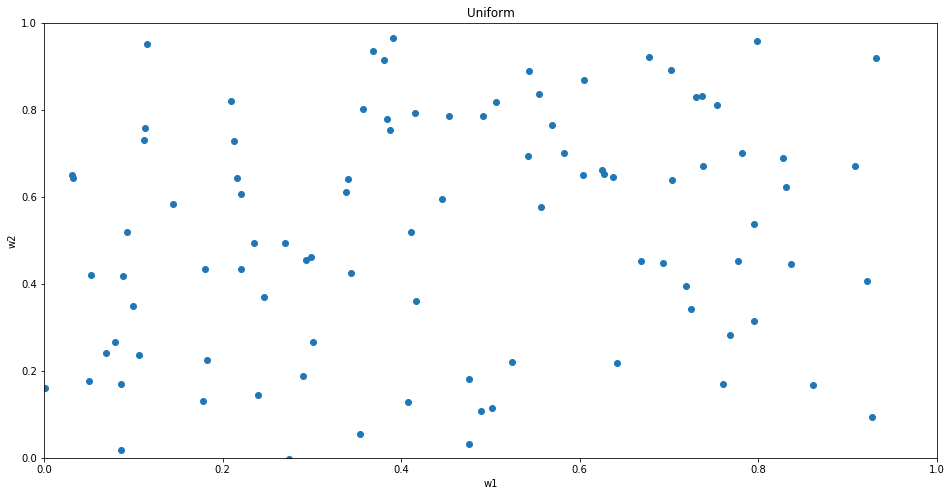

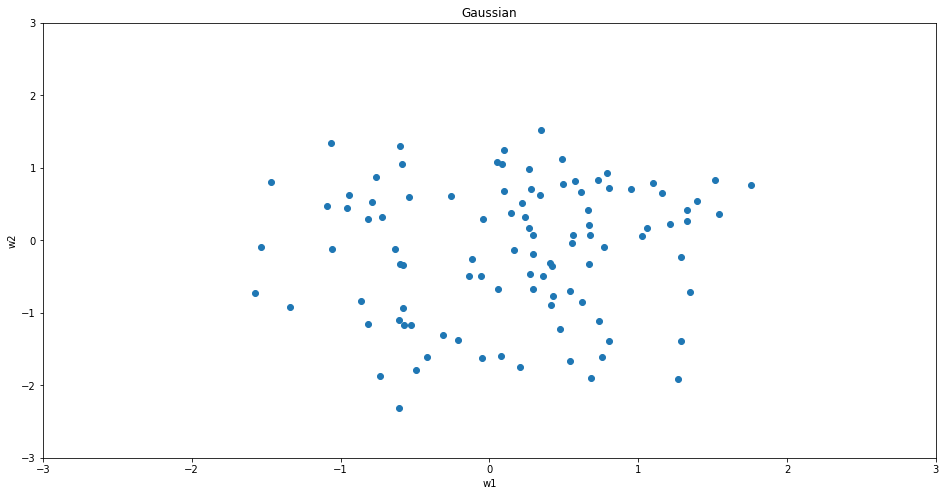

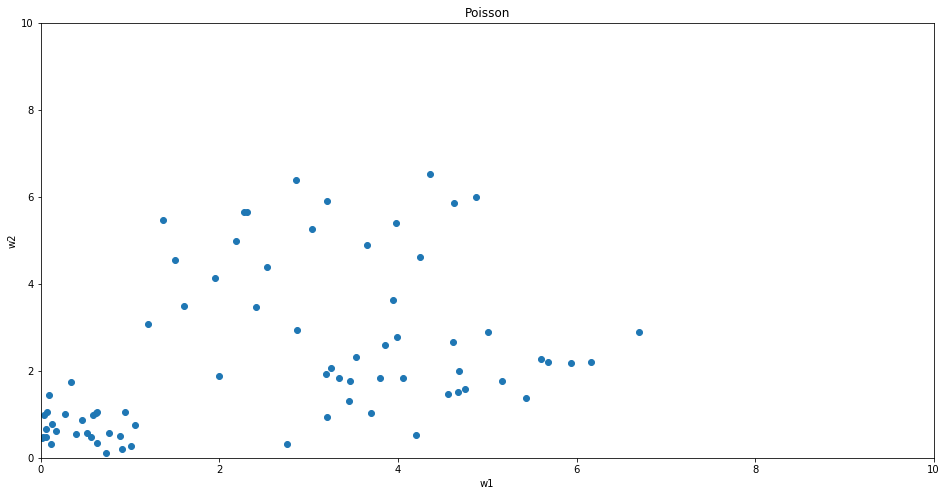

In [6]:
"""
    Plot Stuff
"""
# Uniform
plt.figure(figsize=(16,8))
plt.scatter(weight_uniform[:,0],weight_uniform[:,1])
plt.title('Uniform')
plt.xlabel('w1'); plt.ylabel('w2')
plt.xlim(0,1); plt.ylim(0,1); 

# Gaussian
plt.figure(figsize=(16,8))
plt.scatter(weight_gaussian[:,0],weight_gaussian[:,1])
plt.title('Gaussian')
plt.xlabel('w1'); plt.ylabel('w2')
plt.xlim(-3,3); plt.ylim(-3,3); 

# Poisson
plt.figure(figsize=(16,8))
plt.scatter(weight_poisson[:,0],weight_poisson[:,1])
plt.title('Poisson')
plt.xlabel('w1'); plt.ylabel('w2')
plt.xlim(0,10); plt.ylim(0,10); 

# Show images
plt.show()